In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('DataSets/Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.values.shape

(10000, 14)

<AxesSubplot:>

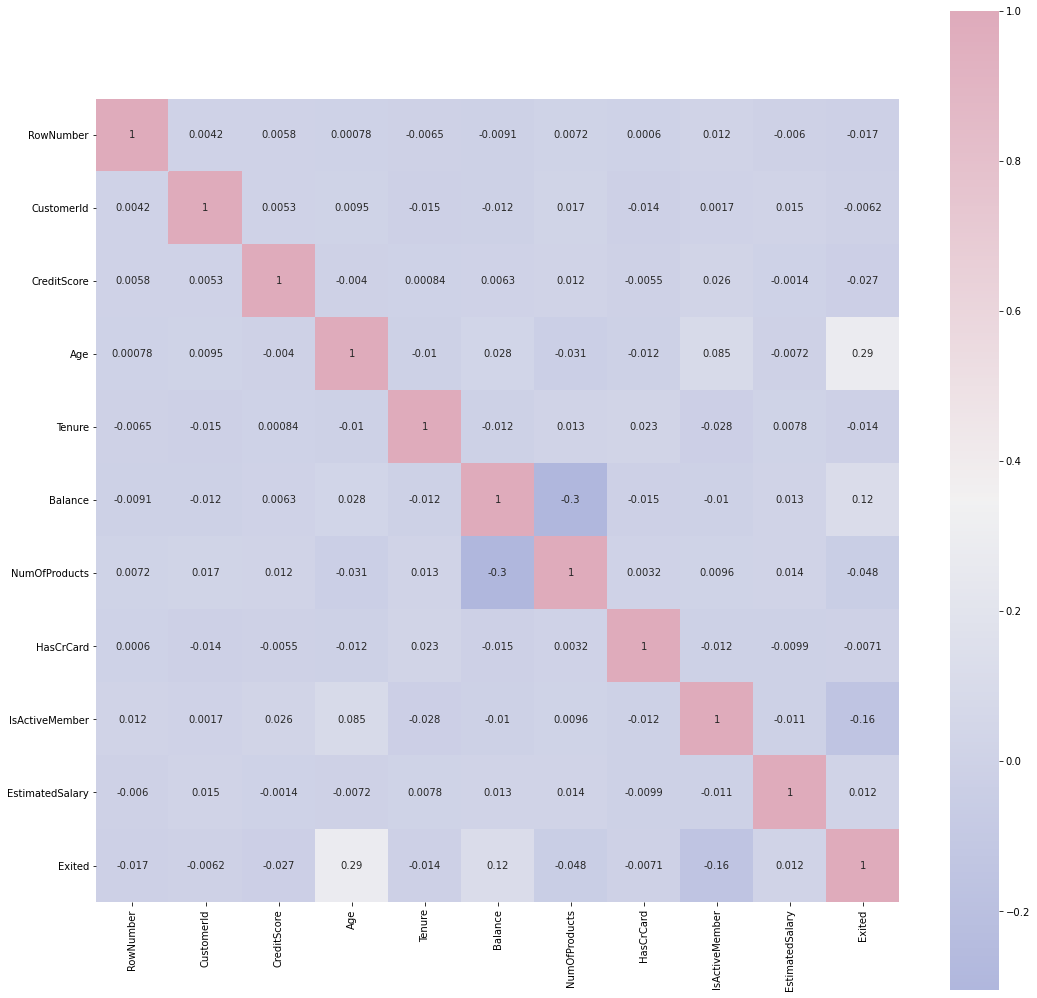

In [5]:
#korelacija podataka
corrmat = dataset.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

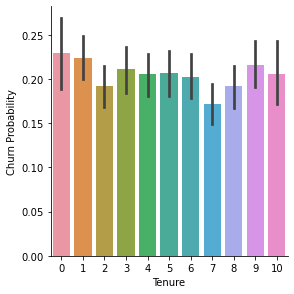

In [7]:
#broj godina u banci kao korisnik
g= sns.catplot(x = "Tenure", y = "Exited", data = dataset, kind = "bar", height = 4)
g.set_ylabels("Churn Probability")
plt.show()

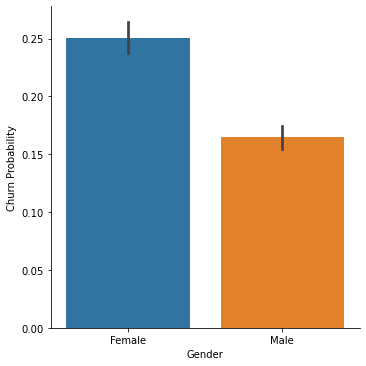

In [8]:
#zene napustaju vise od muskaraca
g= sns.catplot(x = "Gender", y = "Exited", data = dataset, kind = "bar", height = 5)
g.set_ylabels("Churn Probability")
plt.show()

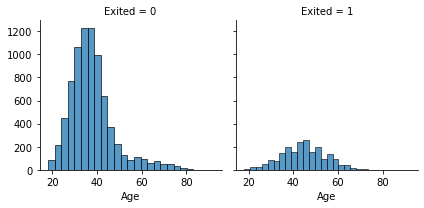

In [15]:
#broj godina
g= sns.FacetGrid(dataset, col = "Exited")
g.map(sns.histplot, "Age", bins = 25)
plt.show()

C:\Users\Aca\.conda\envs\TensorFlow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aca\.conda\envs\TensorFlow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


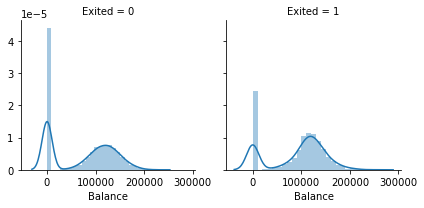

In [17]:
#balans na racunu
g= sns.FacetGrid(dataset, col = "Exited")
g.map(sns.distplot, "Balance", bins = 25)
plt.show()

C:\Users\Aca\.conda\envs\TensorFlow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aca\.conda\envs\TensorFlow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


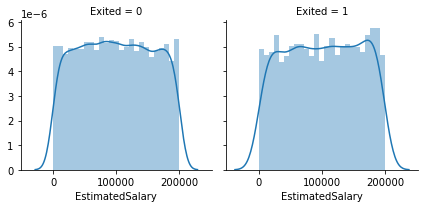

In [18]:
#balans na racunu
g= sns.FacetGrid(dataset, col = "Exited")
g.map(sns.distplot, "EstimatedSalary", bins = 25)
plt.show()

C:\Users\Aca\.conda\envs\TensorFlow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aca\.conda\envs\TensorFlow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


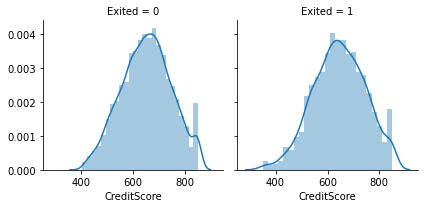

In [19]:
#Credit score korisnika
g= sns.FacetGrid(dataset, col = "Exited")
g.map(sns.distplot, "CreditScore", bins = 25)
plt.show()

In [20]:
categorical = []
numerical = []

for feature in dataset.columns:
    if dataset[feature].dtype == 'object':
        categorical.append(feature)
    else:
        numerical.append(feature)

In [21]:
print(numerical)
print('Ukupan broj numerickih atributa:', len(numerical))

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Ukupan broj numerickih atributa: 11


In [22]:
print(categorical)
print('Ukupan broj kategorickih atributa:', len(categorical))

['Surname', 'Geography', 'Gender']
Ukupan broj kategorickih atributa: 3


Podatak koji se predvidja - exited kolona koja oznacava da li je korisnik aktuelni - vrednost 0 ili je korisnik zatvorio racun u banci - vrednost 1

<AxesSubplot:xlabel='Exited', ylabel='count'>

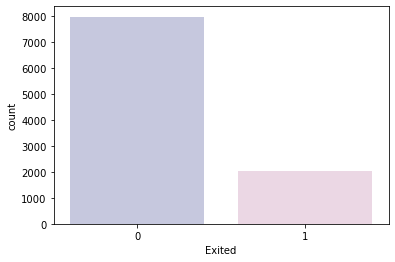

In [23]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= dataset["Exited"], palette= cols)

In [24]:
print('Broj korisnika koji je zatvorio racun:', len(dataset.loc[dataset['Exited'] == 1]))
print(f'U procentima: ', (len(dataset.loc[dataset['Exited'] == 1]) / len(dataset)) * 100, '%')

Broj korisnika koji je zatvorio racun: 2037
U procentima:  20.369999999999997 %


Skaliranje numerickih atributa i uklanjanje irelevantnih vrednosti poput rednog broja i identifikatora korisnika

In [25]:
scaler = MinMaxScaler()
numerical.remove("RowNumber")
numerical.remove("CustomerId")
numerical.remove("Exited")

for record in numerical:
    dataset[record] = scaler.fit_transform(dataset[[record]])
    
dataset[numerical].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[numerical], dataset['Exited'], test_size=0.2)

In [27]:
dataset['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [28]:
X_train.shape

(8000, 8)

In [64]:
model = Sequential([
    Dense(units=16, input_dim=8, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [65]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
model_history = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
640/640 - 3s - loss: 0.5267 - accuracy: 0.7667 - val_loss: 0.4747 - val_accuracy: 0.8019
Epoch 2/20
640/640 - 3s - loss: 0.4742 - accuracy: 0.7962 - val_loss: 0.4536 - val_accuracy: 0.8031
Epoch 3/20
640/640 - 3s - loss: 0.4614 - accuracy: 0.8016 - val_loss: 0.4412 - val_accuracy: 0.8163
Epoch 4/20
640/640 - 3s - loss: 0.4534 - accuracy: 0.8089 - val_loss: 0.4312 - val_accuracy: 0.8188
Epoch 5/20
640/640 - 3s - loss: 0.4465 - accuracy: 0.8098 - val_loss: 0.4241 - val_accuracy: 0.8231
Epoch 6/20
640/640 - 3s - loss: 0.4410 - accuracy: 0.8142 - val_loss: 0.4179 - val_accuracy: 0.8313
Epoch 7/20
640/640 - 3s - loss: 0.4352 - accuracy: 0.8169 - val_loss: 0.4102 - val_accuracy: 0.8325
Epoch 8/20
640/640 - 3s - loss: 0.4287 - accuracy: 0.8184 - val_loss: 0.4054 - val_accuracy: 0.8338
Epoch 9/20
640/640 - 2s - loss: 0.4210 - accuracy: 0.8219 - val_loss: 0.3963 - val_accuracy: 0.8375
Epoch 10/20
640/640 - 3s - loss: 0.4141 - accuracy: 0.8269 - val_loss: 0.3901 - val_accuracy: 0.8369

In [67]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.07063937],
       [0.79445153],
       [0.09825164],
       ...,
       [0.5316049 ],
       [0.22845584],
       [0.04410985]], dtype=float32)

In [68]:
predicted_values = (predicted_values > 0.5)
predicted_values

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

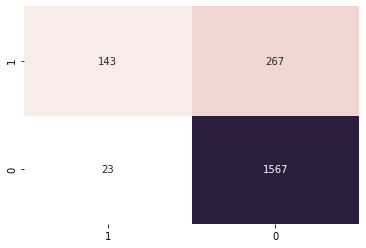

In [69]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=[0, 1], columns=[0, 1])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, annot=True, cbar=False, fmt='d', cmap=cmap)
h_map.invert_yaxis()
h_map.invert_xaxis()

In [70]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1590
           1       0.86      0.35      0.50       410

    accuracy                           0.85      2000
   macro avg       0.86      0.67      0.71      2000
weighted avg       0.86      0.85      0.83      2000



In [71]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.855

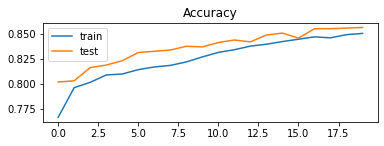

In [72]:
plt.subplot(211)
plt.title('Accuracy')
plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='test')
plt.legend()

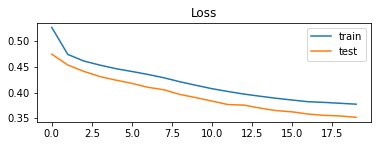

In [73]:
plt.subplot(211)
plt.title('Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()

Dodavanje jos jednog sloja u neuronskoj mrezi

In [74]:
model = Sequential([
    Dense(units=16, input_shape=(8, ), activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
640/640 - 4s - loss: 0.5045 - accuracy: 0.7867 - val_loss: 0.4617 - val_accuracy: 0.8019
Epoch 2/20
640/640 - 3s - loss: 0.4663 - accuracy: 0.7953 - val_loss: 0.4405 - val_accuracy: 0.8025
Epoch 3/20
640/640 - 3s - loss: 0.4482 - accuracy: 0.8048 - val_loss: 0.4241 - val_accuracy: 0.8119
Epoch 4/20
640/640 - 3s - loss: 0.4370 - accuracy: 0.8102 - val_loss: 0.4145 - val_accuracy: 0.8206
Epoch 5/20
640/640 - 3s - loss: 0.4282 - accuracy: 0.8141 - val_loss: 0.4080 - val_accuracy: 0.8275
Epoch 6/20
640/640 - 3s - loss: 0.4207 - accuracy: 0.8152 - val_loss: 0.3999 - val_accuracy: 0.8275
Epoch 7/20
640/640 - 3s - loss: 0.4134 - accuracy: 0.8194 - val_loss: 0.3973 - val_accuracy: 0.8275
Epoch 8/20
640/640 - 3s - loss: 0.4063 - accuracy: 0.8258 - val_loss: 0.3917 - val_accuracy: 0.8325
Epoch 9/20
640/640 - 3s - loss: 0.4021 - accuracy: 0.8302 - val_loss: 0.3789 - val_accuracy: 0.8469
Epoch 10/20
640/640 - 3s - loss: 0.3967 - accuracy: 0.8366 - val_loss: 0.3762 - val_accuracy: 0.8469

In [75]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.06568515],
       [0.8398887 ],
       [0.06323463],
       ...,
       [0.5623776 ],
       [0.28468686],
       [0.02717525]], dtype=float32)

In [76]:
predicted_values = (predicted_values > 0.5)
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8505

Ubacujemo kategoricke kolone

In [77]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,2,15647311,Hill,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,3,15619304,Onio,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,4,15701354,Boni,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,5,15737888,Mitchell,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.842,France,Male,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0
9996,9997,15569892,Johnstone,0.332,France,Male,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0
9997,9998,15584532,Liu,0.718,France,Female,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1
9998,9999,15682355,Sabbatini,0.844,Germany,Male,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1


In [78]:
dataset['Gender'] = dataset['Gender'].replace(['Male'],int('0'))
dataset['Gender'] = dataset['Gender'].replace(['Female'],int('1'))

dataset['Geography'] = dataset['Geography'].replace(['France'],int('0'))
dataset['Geography'] = dataset['Geography'].replace(['Germany'],int('1'))
dataset['Geography'] = dataset['Geography'].replace(['Spain'],int('2'))

dataset['Geography'] = scaler.fit_transform(dataset[['Geography']])

dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,0.538,0.0,1,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,2,15647311,Hill,0.516,1.0,1,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,3,15619304,Onio,0.304,0.0,1,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,4,15701354,Boni,0.698,0.0,1,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,5,15737888,Mitchell,1.000,1.0,1,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.842,0.0,0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0
9996,9997,15569892,Johnstone,0.332,0.0,0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0
9997,9998,15584532,Liu,0.718,0.0,1,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1
9998,9999,15682355,Sabbatini,0.844,0.5,0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1


In [79]:
X = dataset.iloc[:, 3:13]
Y = dataset.iloc[:, 13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,1,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,1,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,1,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,1,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,1,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341
9996,0.332,0.0,0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490
9997,0.718,0.0,1,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390
9998,0.844,0.5,0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
X_train.shape

(8000, 10)

In [81]:
model = Sequential([
    Dense(units=20, input_shape=(10, ), activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history = model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
640/640 - 4s - loss: 0.5211 - accuracy: 0.7684 - val_loss: 0.4829 - val_accuracy: 0.7969
Epoch 2/20
640/640 - 3s - loss: 0.4682 - accuracy: 0.7980 - val_loss: 0.4625 - val_accuracy: 0.7975
Epoch 3/20
640/640 - 3s - loss: 0.4508 - accuracy: 0.8055 - val_loss: 0.4537 - val_accuracy: 0.8138
Epoch 4/20
640/640 - 3s - loss: 0.4400 - accuracy: 0.8103 - val_loss: 0.4422 - val_accuracy: 0.8081
Epoch 5/20
640/640 - 2s - loss: 0.4305 - accuracy: 0.8153 - val_loss: 0.4361 - val_accuracy: 0.8144
Epoch 6/20
640/640 - 3s - loss: 0.4242 - accuracy: 0.8189 - val_loss: 0.4376 - val_accuracy: 0.8106
Epoch 7/20
640/640 - 3s - loss: 0.4184 - accuracy: 0.8200 - val_loss: 0.4258 - val_accuracy: 0.8163
Epoch 8/20
640/640 - 3s - loss: 0.4122 - accuracy: 0.8234 - val_loss: 0.4201 - val_accuracy: 0.8175
Epoch 9/20
640/640 - 3s - loss: 0.4047 - accuracy: 0.8255 - val_loss: 0.4121 - val_accuracy: 0.8219
Epoch 10/20
640/640 - 3s - loss: 0.3988 - accuracy: 0.8300 - val_loss: 0.4073 - val_accuracy: 0.8269

In [82]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.20314604],
       [0.29026282],
       [0.1888845 ],
       ...,
       [0.168798  ],
       [0.09319496],
       [0.12209094]], dtype=float32)

In [83]:
predicted_values = (predicted_values > 0.5)
predicted_values

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

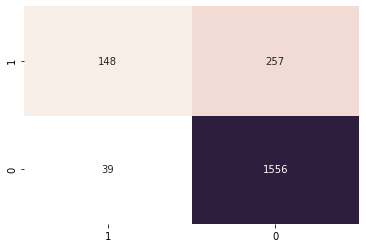

In [84]:
conf_mat = confusion_matrix(y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=[0, 1], columns=[0, 1])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, annot=True, cbar=False, fmt='d', cmap=cmap)
h_map.invert_yaxis()
h_map.invert_xaxis()

In [85]:
class_report = classification_report(y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1595
           1       0.79      0.37      0.50       405

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000



In [86]:
accuracy = accuracy_score(y_test, predicted_values)
accuracy

0.852

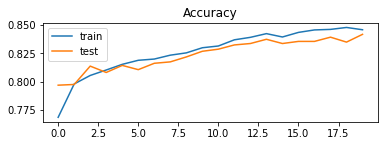

In [87]:
plt.subplot(211)
plt.title('Accuracy')
plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='test')
plt.legend()

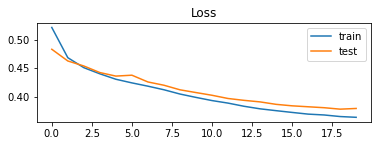

In [88]:
plt.subplot(211)
plt.title('Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()

In [89]:
model = Sequential([
    Dense(units=20, input_shape=(10, ), activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history = model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
640/640 - 4s - loss: 0.5096 - accuracy: 0.7839 - val_loss: 0.4786 - val_accuracy: 0.7969
Epoch 2/20
640/640 - 3s - loss: 0.4642 - accuracy: 0.7959 - val_loss: 0.4596 - val_accuracy: 0.7975
Epoch 3/20
640/640 - 3s - loss: 0.4449 - accuracy: 0.8050 - val_loss: 0.4454 - val_accuracy: 0.8037
Epoch 4/20
640/640 - 3s - loss: 0.4300 - accuracy: 0.8156 - val_loss: 0.4327 - val_accuracy: 0.8100
Epoch 5/20
640/640 - 3s - loss: 0.4174 - accuracy: 0.8188 - val_loss: 0.4241 - val_accuracy: 0.8181
Epoch 6/20
640/640 - 3s - loss: 0.4064 - accuracy: 0.8291 - val_loss: 0.4099 - val_accuracy: 0.8250
Epoch 7/20
640/640 - 3s - loss: 0.3944 - accuracy: 0.8364 - val_loss: 0.3988 - val_accuracy: 0.8319
Epoch 8/20
640/640 - 3s - loss: 0.3832 - accuracy: 0.8417 - val_loss: 0.3904 - val_accuracy: 0.8319
Epoch 9/20
640/640 - 3s - loss: 0.3752 - accuracy: 0.8498 - val_loss: 0.3856 - val_accuracy: 0.8375
Epoch 10/20
640/640 - 3s - loss: 0.3703 - accuracy: 0.8505 - val_loss: 0.3795 - val_accuracy: 0.8469

In [90]:
predicted_values = model.predict(X_test)
predicted_values = (predicted_values > 0.5)
accuracy = accuracy_score(y_test, predicted_values)
accuracy

0.8575

In [91]:
model = Sequential()
model.add(Dense(units = 20, input_shape=(10, ), activation = 'relu'))
#model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 1, activation = 'tanh'))

model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
model_history = model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
640/640 - 4s - loss: 0.4840 - accuracy: 0.7941 - val_loss: 0.4085 - val_accuracy: 0.7969
Epoch 2/20
640/640 - 3s - loss: 0.4095 - accuracy: 0.7958 - val_loss: 0.4068 - val_accuracy: 0.7969
Epoch 3/20
640/640 - 3s - loss: 0.4088 - accuracy: 0.7958 - val_loss: 0.4065 - val_accuracy: 0.7969
Epoch 4/20
640/640 - 3s - loss: 0.4086 - accuracy: 0.7958 - val_loss: 0.4064 - val_accuracy: 0.7969
Epoch 5/20
640/640 - 3s - loss: 0.4085 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969
Epoch 6/20
640/640 - 3s - loss: 0.4085 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969
Epoch 7/20
640/640 - 3s - loss: 0.4084 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969
Epoch 8/20
640/640 - 3s - loss: 0.4084 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969
Epoch 9/20
640/640 - 3s - loss: 0.4084 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969
Epoch 10/20
640/640 - 3s - loss: 0.4084 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969

In [92]:
predicted_values = model.predict(X_test)
predicted_values = (predicted_values > 0.5)
accuracy = accuracy_score(y_test, predicted_values)
accuracy

0.7975

In [104]:
model = Sequential([
    Dense(units=32, input_shape=(10, ), activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history = model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
640/640 - 4s - loss: 0.4904 - accuracy: 0.7955 - val_loss: 0.4714 - val_accuracy: 0.7969
Epoch 2/20
640/640 - 3s - loss: 0.4536 - accuracy: 0.7986 - val_loss: 0.4491 - val_accuracy: 0.8075
Epoch 3/20
640/640 - 3s - loss: 0.4295 - accuracy: 0.8120 - val_loss: 0.4313 - val_accuracy: 0.8125
Epoch 4/20
640/640 - 3s - loss: 0.4136 - accuracy: 0.8214 - val_loss: 0.4143 - val_accuracy: 0.8175
Epoch 5/20
640/640 - 3s - loss: 0.3969 - accuracy: 0.8284 - val_loss: 0.4000 - val_accuracy: 0.8256
Epoch 6/20
640/640 - 3s - loss: 0.3826 - accuracy: 0.8367 - val_loss: 0.3850 - val_accuracy: 0.8288
Epoch 7/20
640/640 - 3s - loss: 0.3739 - accuracy: 0.8427 - val_loss: 0.3799 - val_accuracy: 0.8344
Epoch 8/20
640/640 - 3s - loss: 0.3667 - accuracy: 0.8453 - val_loss: 0.3737 - val_accuracy: 0.8469
Epoch 9/20
640/640 - 3s - loss: 0.3610 - accuracy: 0.8487 - val_loss: 0.3719 - val_accuracy: 0.8438
Epoch 10/20
640/640 - 4s - loss: 0.3592 - accuracy: 0.8517 - val_loss: 0.3773 - val_accuracy: 0.8456

In [106]:
predicted_values = model.predict(X_test)
predicted_values = (predicted_values > 0.5)
accuracy = accuracy_score(y_test, predicted_values)
accuracy

0.8595

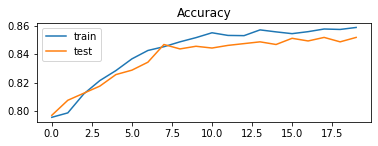

In [107]:
plt.subplot(211)
plt.title('Accuracy')
plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='test')
plt.legend()

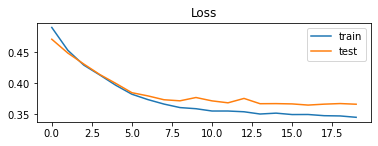

In [108]:
plt.subplot(211)
plt.title('Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()